In [1]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv(r'C:\Users\dell\Desktop\email-spam-classifier\spam.csv', encoding = 'latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. improvement
# 7. Website
# 8. Deploy

## Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)

In [13]:
df['target'] = df['target'].map({'spam':1, 'ham':0})

In [14]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
# missing values
df.isnull().sum() # no missing values

target    0
text      0
dtype: int64

In [16]:
# duplicates values
df.duplicated().sum() # duplicates are present

403

In [17]:
df = df.drop_duplicates()

## EDA

In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt

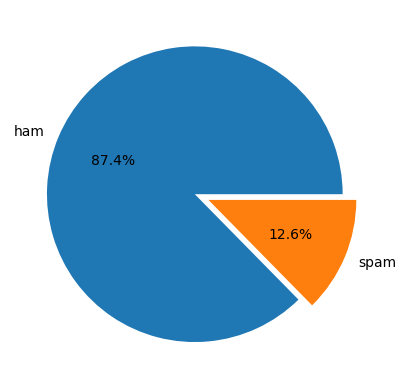

In [20]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct = '%.1f%%', explode = [0, 0.1])
plt.show()

In [21]:
# Data is imbalanced

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [26]:
df['num_characters'] = df['text'].apply(len)
df.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_13784\83982535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\dell\AppData\Local\Temp\ipykernel_13784\2435226368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\dell\AppData\Local\Temp\ipykernel_13784\120005368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [30]:
df

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [31]:
df.describe()

,target,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [32]:
df[df['target'] == 0].describe()

,target,num_characters,num_words,num_sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [33]:
df[df['target'] == 1].describe()

,target,num_characters,num_words,num_sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

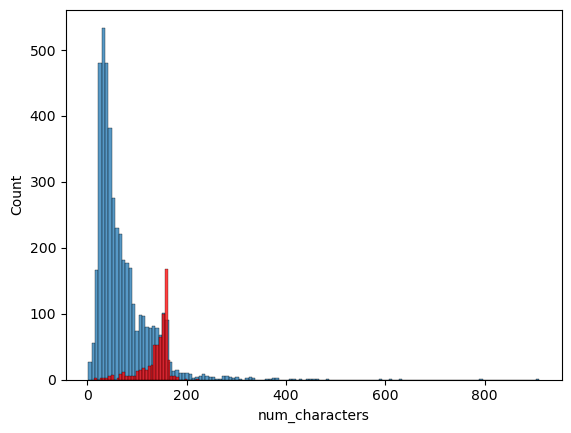

In [35]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

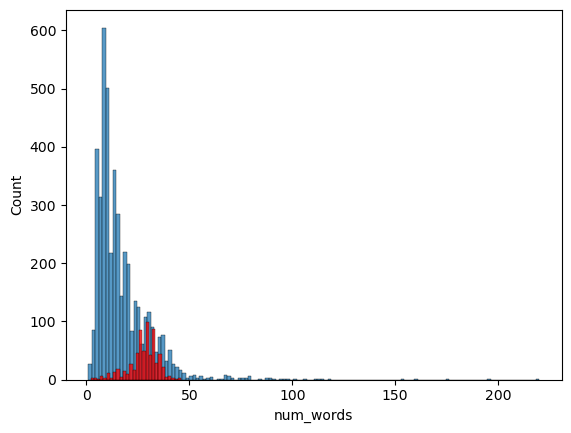

In [36]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

<Axes: xlabel='num_sentence', ylabel='Count'>

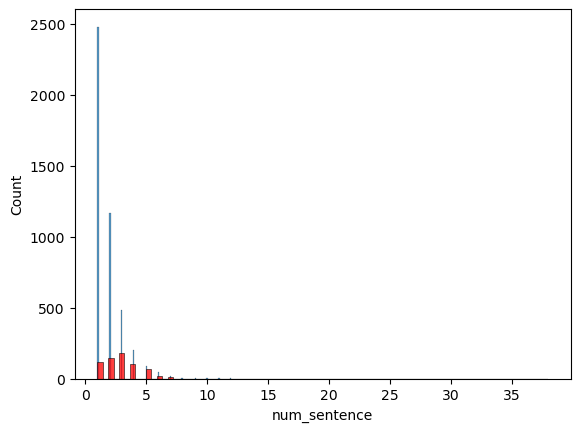

In [37]:
sns.histplot(df[df['target'] == 0]['num_sentence'])
sns.histplot(df[df['target'] == 1]['num_sentence'], color = 'red')

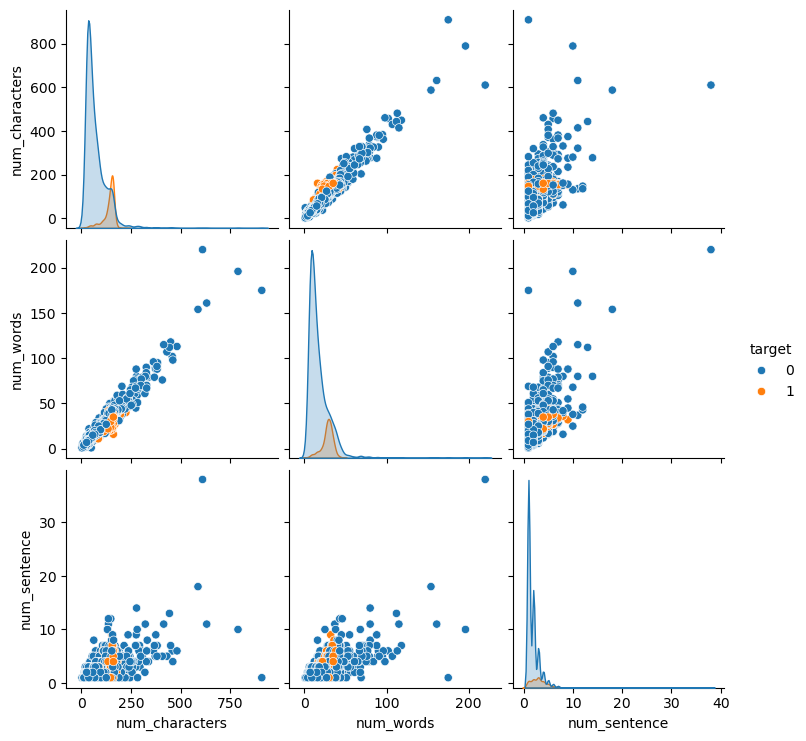

In [38]:
sns.pairplot(df, hue = 'target')

<Axes: >

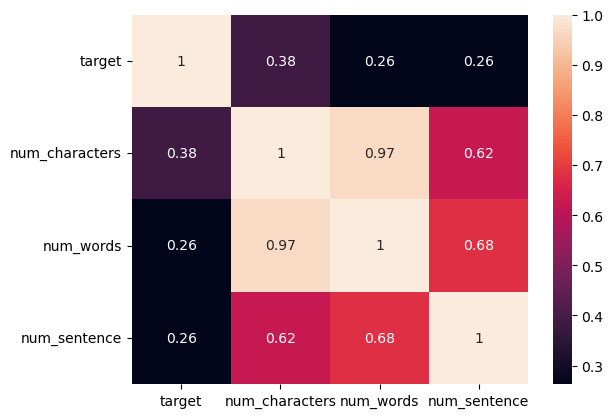

In [39]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentence']].corr(), annot=True)

## 3. Data Preprocessing

In [40]:
# lowercase
# tokenize
# special character
# stopwords
# stemming

In [45]:
import nltk
from nltk import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [46]:
def preprocessing(x):
    x = x.lower()
    x = x.translate(str.maketrans('', '', string.punctuation))
    words = stopwords.words('english')
    x = ' '.join([word for word in x.split() if word not in words])
    ps = PorterStemmer()
    ps.stem(x)
    x = word_tokenize(x)
    return ' '.join(x)

In [47]:
preprocessing(df['text'][0])

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [53]:
df['transformed_text'] = df['text'].apply(preprocessing)

C:\Users\dell\AppData\Local\Temp\ipykernel_13784\353099665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(preprocessing)


In [48]:
!pip install wordcloud

   ---------------------------------------- 0.0/307.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/307.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/307.2 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/307.2 kB 558.5 kB/s eta 0:00:01
   ----------------- -------------------- 143.4/307.2 kB 847.9 kB/s eta 0:00:01
   ----------------------------------- ---- 276.5/307.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  307.2/307.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 307.2/307.2 kB 948.8 kB/s eta 0:00:00


In [49]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [55]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

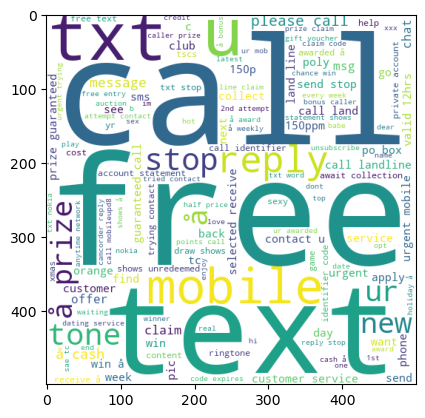

In [56]:
plt.imshow(spam_wc)

In [57]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))

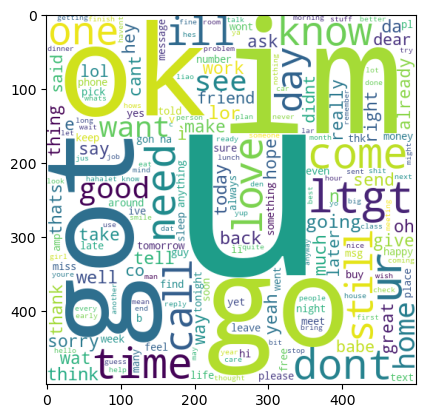

In [58]:
plt.imshow(ham_wc)

In [59]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

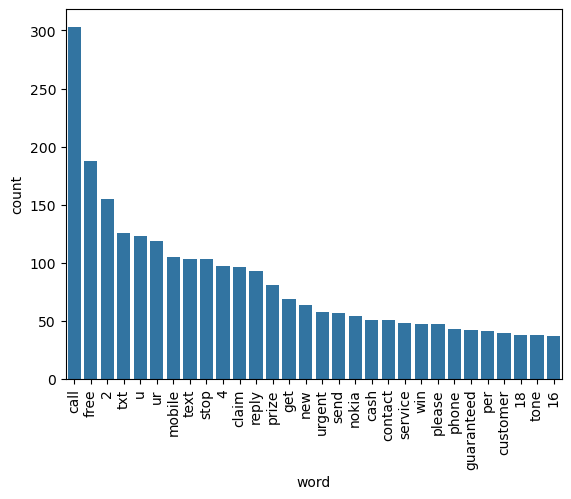

In [60]:
from collections import Counter
top30 = pd.DataFrame(Counter(spam_corpus).most_common(30), columns = ['word', 'count'])
sns.barplot(x='word', y='count', data=top30)
plt.xticks(rotation='vertical')
plt.show()

In [61]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

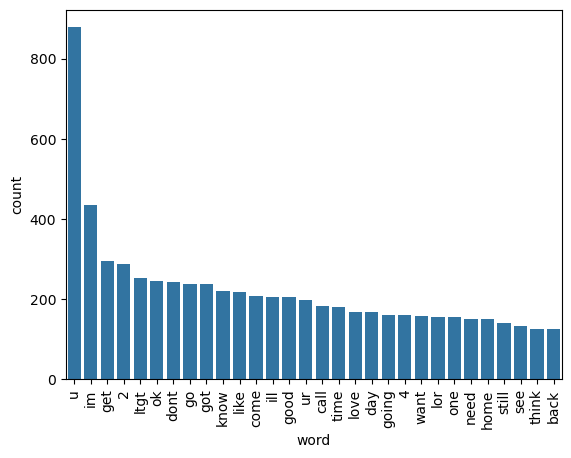

In [62]:
from collections import Counter
top30 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns = ['word', 'count'])
sns.barplot(x='word', y='count', data=top30)
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['transformed_text']).toarray()
Y = df['target'].values

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
Y = df['target'].values

In [65]:
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# X = mms.fit_transform(X)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 43)

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)

In [70]:
print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

0.8762088974854932
0.5232067510548524
[[782 113]
 [ 15 124]]


In [71]:
mnb.fit(X_train, Y_train)
y_pred = mnb.predict(X_test)

In [72]:
print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

0.9748549323017408
0.991304347826087
[[894   1]
 [ 25 114]]


In [73]:
bnb.fit(X_train, Y_train)
y_pred = bnb.predict(X_test)

In [74]:
print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

0.9729206963249516
0.9663865546218487
[[891   4]
 [ 24 115]]


In [88]:
import pickle
pickle.dump(mnb, open(r'C:\Users\dell\Desktop\email-spam-classifier\model.pkl', 'wb'))
pickle.dump(tfidf, open(r'C:\Users\dell\Desktop\email-spam-classifier\vectorize.pkl', 'wb'))